# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [34]:
# Run this code:

%matplotlib inline

import matplotlib.pyplot as plt

In [35]:
# Import numpy and pandas:
import pandas as pd
import numpy as np

# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [36]:
# Run this code

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [37]:
# Your code here:
print(cats.shape)
print(dogs.shape)


(4096, 80)
(4096, 80)


What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [38]:
# Your code here:
cats[0]



array([ 64,  23, 250, 137,  55, 173,  18, 134,  19,  47, 109, 164,  41,
        78, 108, 108, 247, 105, 158,  54, 103,   4,  23, 102, 239,  72,
        42,  21, 168, 109, 112, 177,  22, 233,  15, 236, 250, 137,  32,
         5, 178, 109,  24, 107,  53, 241, 226, 143,   5, 136,  98, 100,
        89,  66, 228,  92, 255,  88, 230,  56, 160,  69,   6,  24, 195,
       183, 239,  35, 154, 154, 122,  18,  87, 106, 174,  69,  28,  60,
       223, 101], dtype=int64)

Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

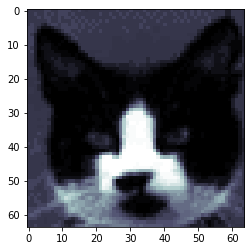

In [39]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(cats[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

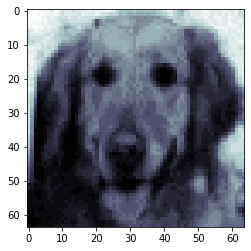

In [40]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(dogs[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

In [41]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    print(mean, std)
    return (x-mean) / std


standardize(np.array([[1,2,3],[4,5,6]]))
    

[2.5 3.5 4.5] [1.5 1.5 1.5]


array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [42]:
# Your code here:
dogsandcats = np.concatenate([dogs, cats], axis=1)


Standardize the concatenated array below.

In [43]:
# Your code here:
standardize(dogsandcats)

[ 86.87036133 153.08520508  89.57641602 139.72192383 107.21875
 110.53344727 145.91333008 129.62426758 100.31518555 111.27929688
 113.30200195  86.80859375 156.45678711  74.37402344 115.13525391
 105.3894043  100.39916992 124.72558594  98.86450195  86.07519531
  92.5012207  123.43237305  75.37109375 160.19702148 148.74169922
 151.13037109  71.95288086 108.87255859  98.92504883 147.12084961
 126.89355469 154.64526367 119.2824707  176.171875   145.37915039
 144.5625      92.09887695 159.39038086 166.60107422 147.01123047
 132.97436523 102.68286133 175.25024414 152.51489258 136.30737305
 136.74975586 143.38769531 156.63818359 117.11816406 157.01293945
 116.62890625  63.30932617  53.11645508 101.4765625  127.13842773
 100.30419922 110.2265625  122.6628418  116.25756836 108.06518555
 125.9387207  114.57177734 137.43823242  83.06494141 182.51611328
 143.42382812  85.41186523 111.20800781 143.25927734 117.7902832
 150.36206055 147.27270508 114.65332031 159.74584961 105.9519043
 129.49829102 1

array([[ 2.37662907, -0.30753004,  0.93254857, ..., -1.80817356,
         1.42293481, -0.20363951],
       [ 2.37662907, -0.40500299,  1.15681724, ..., -2.06459792,
         1.44036713, -0.05437635],
       [ 2.37662907, -0.68349716,  0.93254857, ..., -1.73124626,
         1.45779946, -0.07925354],
       ...,
       [ 0.22755315, -0.68349716,  0.63352369, ..., -0.65426398,
         0.67334483,  0.11976401],
       [ 0.22755315, -0.40500299,  0.35941754, ..., -0.32091232,
         0.70820948, -0.45241144],
       [ 0.22755315, -0.40500299,  0.35941754, ..., -0.67990641,
         0.62104786,  0.09488681]])

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [44]:
# Your code here:
from statsmodels.multivariate.pca import PCA

pca = PCA(dogsandcats,standardize=False, ncomp=2)
pca.factors


array([[-0.0281972 ,  0.03761988],
       [-0.02930316,  0.03603805],
       [-0.02896758,  0.03650552],
       ...,
       [-0.00500112,  0.01625536],
       [-0.00460157,  0.01609771],
       [-0.00393417,  0.01648368]])

Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

In [45]:
# Your code here:
dogsandcats = np.transpose(dogsandcats)
dogsandcats


array([[224, 224, 224, ..., 100, 100, 100],
       [131, 124, 104, ..., 104, 124, 124],
       [127, 136, 127, ..., 115, 104, 104],
       ...,
       [ 60,  50,  63, ..., 105, 118, 104],
       [223, 224, 225, ..., 180, 182, 177],
       [101, 107, 106, ..., 114,  91, 113]], dtype=int64)

Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [46]:
# Your code here:
dotted = np.dot(dogsandcats,pca.factors)
dotted


array([[-2.40786800e+03,  8.93333874e+02],
       [-2.34665905e+03, -1.32160553e+03],
       [ 5.07254368e+02, -6.81392256e+02],
       [-2.64165539e+02, -1.45568020e+03],
       [-1.60897076e+03,  2.73880881e+02],
       [ 6.45022178e+02, -3.48591367e+03],
       [-1.15965281e+03, -6.67529300e+02],
       [-1.00149556e+03, -2.68910387e+03],
       [-6.63399571e+02, -1.97542336e+03],
       [-2.41675441e+03,  1.91917278e+02],
       [-4.76858644e+01, -1.94054090e+03],
       [-7.23693993e+02, -5.69983548e+02],
       [-3.83195745e+02, -5.99209821e+02],
       [ 7.85261664e+01, -4.84601632e+02],
       [-1.26936121e+03, -2.02844099e+03],
       [-7.89179954e+02, -1.39976528e+03],
       [-8.57605151e+02, -4.46411688e+02],
       [-2.18619829e+03, -1.14704924e+03],
       [-8.32744055e+02, -1.26244553e+03],
       [-1.06506433e+03, -3.03331249e+03],
       [ 1.42952102e+02, -2.12665966e+03],
       [-2.01743423e+02, -2.96178147e+03],
       [-5.34084086e+02, -7.64471802e+02],
       [-9.

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [47]:
# Your code here:
pcs = pd.DataFrame(data=dotted, columns=['pc1', 'pc2'])
pcs

,pc1,pc2
0,-2407.868001,893.333874
1,-2346.659053,-1321.605532
2,507.254368,-681.392256
3,-264.165539,-1455.680197
4,-1608.970759,273.880881
...,...,...
155,1107.805287,-829.107319
156,1820.068257,-1285.148293
157,1749.402414,-476.834192
158,-1002.223283,-157.031969


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [48]:
# Your code here:
colors = []
for i in range(80):
    colors.append('blue')
for i in range(80):
    colors.append('red')


Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

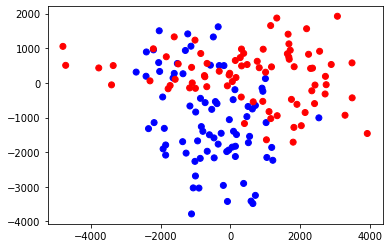

In [49]:
# Your code here:

plt.scatter(pcs['pc1'], pcs['pc2'], c=colors)

Do you see a clear separation between cats and dogs? Write your answer below.

They are not clearly separated because they must have some common caracteristics